### Author: Babaniyi Olaniyi (horlaneyee@gmail.com)
### Data description: DatasetDaily Week 2 submission

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

# Research Questions

## PART A: Descriptive Statistics, Visualisation and Insight
1. How does consumers behaviours change with economic factors?
2. How is the manufacturing sector affected by the probability of recession?
3. How is the financial sector by government policies?
4. How is the government affected by a downturn in the economy?
5. How do we know when an economy is booming?

## PART B: Modelling and Estimation

Compare different models for recession prediction, focusing on methods from the field of Machine Learning (ML).

Previous attempts of predicting recession were generally hampered by data availability as evident in this study as well.

In [51]:
# Data Cleaning and Wrangling

df = pd.read_excel("/eos/home-f/franzoni/SWAN_projects/DatasetDaily/Week2_COVID_Economics/data/economics.xlsx")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['year'] = df['observation_date'].dt.year
df['month'] = df['observation_date'].dt.month

# GF fixes hames of culums where units have been added after the notebook was written... :-(
# remove units
df = ( df.rename(columns={'unemployment_rate (%)': 'unemployment_rate',
                        'credit_delinquency_rate (%)':'credit_delinquency_rate',
                        'recession_probability (%)':'recession_probability',
                        'federal_funds_rate (%)':'federal_funds_rate',
                        'manufacturers_new_orders_durable_goods (millions of dollars)':'manufacturers_new_orders_durable_goods',
                        'manufacturer_new_orders_consumer_goods (millions of dollars)':'manufacturer_new_orders_consumer_goods',
                        'total_vehicle_sales (millions of units)':'total_vehicle_sales',
                        'new_one_family_houses_sold (thousands)':'new_one_family_houses_sold',
                        'total_employment (thousands)':'total_employment',
                         'consumer_credit (billions of dollars)':'consumer_credit'
                             },
                    ) ).copy()
print('\n%s\n'%df.columns) 

print("\n___ Descriptive stats of the probability of recession____")
print (df['recession_probability'].describe())

print("\n____Categorising probabilities of recession_____")
df['recession_probability'] = df['recession_probability']/100

#####################################
# ++ np.where ++ 
#          numpy.where(condition[, x, y])
#          Return elements chosen from x or y depending on condition.
#          https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
print("\n____Some fun with where____\n")
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

df['recession']      = np.where(df['recession_probability']>.50,1, 0)
# GF introduces a binning in three areas of recession sentiment
df['recession_GF']   = np.where(df['recession_probability']>.33,1, 0)
df['recession_GF']   = np.where(df['recession_probability']>.66,2, df['recession_GF'])
print(df['recession'].value_counts())


#####################################
# ++ pandas.DataFrame.isna ++ 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html
# Return a boolean same-sized object indicating if the values are NA
print("\n____Number of missing values by column____")
# print(df.isna().head())
print(df.isna().sum(axis=0).sort_values(ascending=False).head(99))


#####################################
# ++ pandas.DataFrame.sum ++
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
print("\n____Number of missing values total: %d____"%df.isna().sum(axis=0).sum(axis=0))


print("\n____Dropping missing values____")
df2 = df.dropna()
df2 = df2.reset_index()            # https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe
df2 = df2.drop(['index'], axis=1)
df2['year']  = df2['year'].astype('category')
df2['month'] = df2['month'].astype('category')

print("\n______Data types____")
df2.info()

df2['manufacturers_new_orders_durable_goods'] = df2['manufacturers_new_orders_durable_goods'].astype(float)
df2['industrial_production_index'] = df2['industrial_production_index'].astype(float)
df2['new_one_family_houses_sold'] = df2['new_one_family_houses_sold'].astype(float)

#####################################
# ++ pandas.DataFrame.select_dtypes ++
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
num_df = df2.select_dtypes(['int', 'float'])
cat_df = df2.select_dtypes(['category'])


Index(['observation_date', 'total_employment', 'consumer_credit',
       'credit_delinquency_rate', 'unemployment_rate', 'federal_funds_rate',
       'consumer_opinion', 'recession_probability',
       'manufacturers_new_orders_durable_goods',
       'manufacturer_new_orders_consumer_goods', 'total_vehicle_sales',
       'industrial_production_index', 'new_one_family_houses_sold', 'year',
       'month'],
      dtype='object')


___ Descriptive stats of the probability of recession____
count    634.000000
mean      10.549385
std       26.724375
min        0.000000
25%        0.020000
50%        0.080000
75%        0.620000
max      100.000000
Name: recession_probability, dtype: float64

____Categorising probabilities of recession_____

____Some fun with where____

0    914
1     62
Name: recession, dtype: int64

____Number of missing values by column____
manufacturer_new_orders_consumer_goods    639
manufacturers_new_orders_durable_goods    637
credit_delinquency_rate                 

In [52]:
df2.head()

,observation_date,total_employment,consumer_credit,credit_delinquency_rate,unemployment_rate,federal_funds_rate,consumer_opinion,recession_probability,manufacturers_new_orders_durable_goods,manufacturer_new_orders_consumer_goods,total_vehicle_sales,industrial_production_index,new_one_family_houses_sold,year,month,recession,recession_GF
0,1992-02-01,108311.0,799.64038,5.27,7.4,4.06,98.094612,0.0002,114535.0,19863.0,12.927,63.7911,639.0,1992,2,0,0
1,1992-03-01,108365.0,799.44211,5.27,7.4,3.98,98.523481,0.0000,120025.0,20776.0,12.824,64.3212,553.0,1992,3,0,0
2,1992-04-01,108519.0,797.65814,5.10,7.4,3.73,98.864178,0.0000,124470.0,21635.0,12.550,64.8088,546.0,1992,4,0,0
3,1992-05-01,108649.0,797.66790,5.10,7.6,3.82,99.058147,0.0005,125822.0,21870.0,13.098,65.0202,554.0,1992,5,0,0
4,1992-06-01,108715.0,797.27631,5.10,7.8,3.76,99.063863,0.0005,122834.0,20928.0,13.543,65.0295,596.0,1992,6,0,0


After dropping the missing observations, we have 28 years of data spanning over 335 months.

(14, 14)
(14, 14)


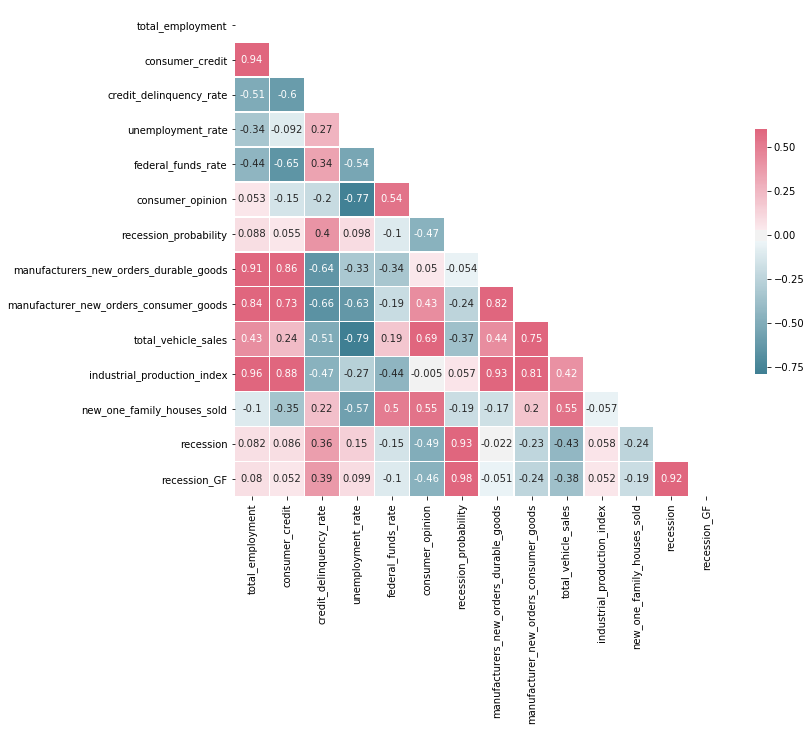

In [53]:
# Compute the correlation matrix
corr = num_df.corr()
corr = np.round(corr, 3)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
print(corr.shape)
print(np.ones_like(corr).shape)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# https://www.boronine.com/2012/03/26/Color-Spaces-for-Human-Beings/
# https://everydayanalytics.ca/2017/03/when-to-use-sequential-and-diverging-palettes.html
#####################################
# ++ # https://seaborn.pydata.org/generated/seaborn.diverging_palette.html ++
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
# Correlation values
corr

,total_employment,consumer_credit,credit_delinquency_rate,unemployment_rate,federal_funds_rate,consumer_opinion,recession_probability,manufacturers_new_orders_durable_goods,manufacturer_new_orders_consumer_goods,total_vehicle_sales,industrial_production_index,new_one_family_houses_sold,recession,recession_GF
total_employment,1.000,0.939,-0.512,-0.339,-0.443,0.053,0.088,0.907,0.843,0.429,0.963,-0.105,0.082,0.080
consumer_credit,0.939,1.000,-0.602,-0.092,-0.654,-0.148,0.055,0.865,0.734,0.238,0.883,-0.347,0.086,0.052
credit_delinquency_rate,-0.512,-0.602,1.000,0.268,0.342,-0.203,0.403,-0.643,-0.662,-0.510,-0.467,0.218,0.360,0.386
unemployment_rate,-0.339,-0.092,0.268,1.000,-0.537,-0.773,0.098,-0.325,-0.633,-0.791,-0.266,-0.574,0.154,0.099
federal_funds_rate,-0.443,-0.654,0.342,-0.537,1.000,0.544,-0.102,-0.340,-0.194,0.191,-0.438,0.503,-0.152,-0.103
consumer_opinion,0.053,-0.148,-0.203,-0.773,0.544,1.000,-0.470,0.050,0.434,0.693,-0.005,0.545,-0.493,-0.461
recession_probability,0.088,0.055,0.403,0.098,-0.102,-0.470,1.000,-0.054,-0.244,-0.370,0.057,-0.186,0.927,0.984
manufacturers_new_orders_durable_goods,0.907,0.865,-0.643,-0.325,-0.340,0.050,-0.054,1.000,0.824,0.436,0.928,-0.169,-0.022,-0.051
manufacturer_new_orders_consumer_goods,0.843,0.734,-0.662,-0.633,-0.194,0.434,-0.244,0.824,1.000,0.747,0.806,0.203,-0.235,-0.239
total_vehicle_sales,0.429,0.238,-0.510,-0.791,0.191,0.693,-0.370,0.436,0.747,1.000,0.416,0.548,-0.427,-0.378


# PART A: Insights
We use correlation analysis to find interesting insights in our data

**1. How does consumers behaviours change with economic factors?**

Consumer behaviours are measured using consumer credit and consumer opinion.

1. Consumer credit is a personal debt taken on to purchase everyday goods and services. We see that consumer credit is positively associated (0.93) with total employment. That is, as more people join the workforce consumer credit increases.

2. Also, as expected consumer credit (-0.6) is negatively associated with credit delinquency rate. In other words, a rise in deliquent rates leads to lower customer credit as people tend to be morre cautious with their spending.

3. Interestingly, we find that as consumer credit increases the number of new housees sold decreases (-0.34). This is understandable as people need money/good credit score to buy houses so when they owe debt on purchasing basic amenities, they can't afford to pay for houses.

4. We see that when people are optimistic about their finances and state of the economy they **tend** to increase their comfort by purchasing cars and houses. This is explained by the significant positive association between consumer opinion and total_vehicle_sales (0.434), new_one_family_houses_sold (0.545). On the other hand, if they perceive a downturn in the economy, as expected they become pessimistic (this is explained by the negative association when there is an increase in unemployment rate (-0.77) and recession (-0.493)).


**2. How is the manufacturing sector affected by the probability of recession?**

Variables used to measure the performance of the manufacturing industry are the number of new orders for durable goods, consumer goods and vehicle sales.

Durable goods orders reflects new orders placed with domestic manufacturers for delivery of factory hard goods (durable goods) in the near term or future. Durable goods orders provide more insight into the supply chain than most indicators and can be especially useful in helping investors understand the earnings in industries, such as machinery, technology manufacturing, and transportation.

Consumer goods A decreasing level of new orders is a worrying signal for the economy, as the level of retail sales act as a forward indicator for job growth at retail establishments and for companies manufacturing these products.

1. We see that as more people join the workforce, there will be more orders for durable goods which is a good sign for the manufacturing industry. This is evident in the strong positive correlation (0.84) between total_employment and orders for manufacturers_new_orders_durable_goods.

2. We also see that there is a strong positve association between orders for durable goods and consumer debt (0.86), vehicle sales (0.43).

3. On the other hand, orders for durable goods is negatively associated with unemployment rate and credit delinquent rate. Also when there's a high probability of the economy going into recession, the orders for durable goods decreases. The changing pattern of demand in the consumer goods sector impacts companies operating in the retail.

4. The effect on orders for consumer goods is similar to that of durable goods. However, we see that when there's an increase in the number of houses sold, the demand for consumer goods increases.

A high durable goods number indicates an economy on the upswing while a low number indicates a downward trajectory.
In sum, an increase in number of people gainfully employed, vehicle sales and consumer credit is a signal for the manufacturing industry that there will be more demand for durable and consumer goods.

**3. How is the financial sector by government policies?**
We use credit delinquent rate and federal funds rate to measure the performance of the financial sector.

Federal funds rate refers to the interest rate that banks charge other banks for lending to them excess cash from their reserve balances on an overnight basis.

1. We see that there is a strong negative association between credit delinquent rate and number of people joining the workforce, consumer credit, demand for durable and consumer goods, vehicle sales.

2. As anticipated, an increase in credit delinquentrate leads to a corresponding increase in unemployment rate, federal funds rate and higher chances of recession.

3. The effect is a bit different for federal funds rate as an increase in federal funds rate leads to an increases in house sales, credit delinquent rate and people are a bit optimistic about the state of the economy. However, it leads to a decrease in consumer credit and unemoployment rate. 

**4. How is the government affected by a downturn in the economy?**

When unemployment rate increases:
- People's faith in government (consumer opinion) decreases rapidly
- The manufacturing bleeds as the demand for durable & consumer goods, vehicle & house sales decreases.

When the likelihood of recession increases: 
- Credit delinquency rate increases
- People become pessimistics, demand for consumer goods decreases as there is not sufficient money in circulation to purchase basic amenities.

**5. How do we know when an economy is booming?**
- When there's low unemployment rate, high consumer credit, manufacturing industry post profits, high vehicle and house sales.

# VISUALISATIONS

Text(0.5, 0, 'Year')

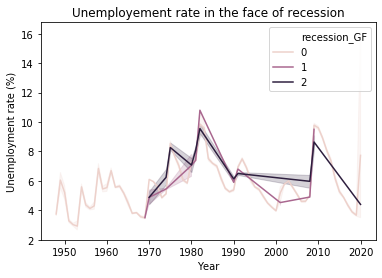

In [70]:
# VISUALISATION
# ++ seaborn.lineplot ++ 
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.lineplot(x="year", y="unemployment_rate",
             hue="recession_GF",
             #hue="recession",
             data=df)
plt.title("Unemployement rate in the face of recession")
plt.ylabel("Unemployment rate (%)")
plt.xlabel("Year")



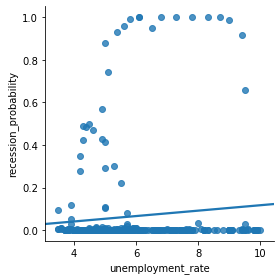

In [56]:
sns.lmplot(x="unemployment_rate", y="recession_probability", data=df2,
        ci=None, palette="muted", height=4)

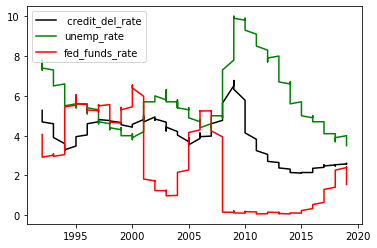

In [57]:
plt.plot(df2[['year']], df2[['credit_delinquency_rate']], color='k', label =' credit_del_rate')
plt.plot(df2[['year']], df2[['unemployment_rate']], color='g', label = 'unemp_rate')
plt.plot(df2[['year']], df2[['federal_funds_rate']], color='r', label ='fed_funds_rate')
plt.legend()
plt.show()



([<matplotlib.axis.XTick at 0x7ff653942290>,
 <a list of 2 Text xticklabel objects>)

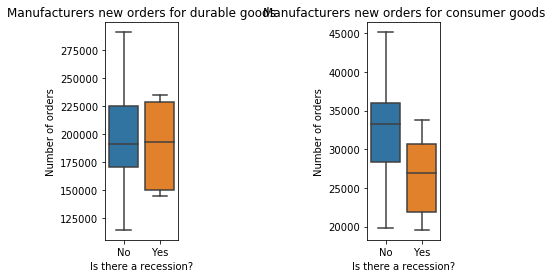

In [58]:
plt.subplot(1, 4, 1)
sns.boxplot(x="recession", y="manufacturers_new_orders_durable_goods", data = df2)
plt.title("Manufacturers new orders for durable goods")
plt.ylabel("Number of orders")
plt.xlabel("Is there a recession?")
plt.xticks([0,1],['No','Yes'])

plt.subplot(1, 4, 4)
sns.boxplot(x="recession", y="manufacturer_new_orders_consumer_goods", data = df2)
plt.title("Manufacturers new orders for consumer goods")
plt.ylabel("Number of orders")
plt.xlabel("Is there a recession?")
plt.xticks([0,1],['No','Yes'])

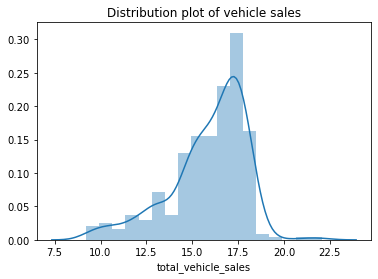

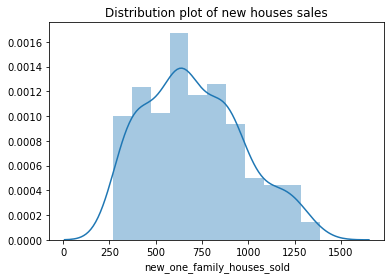

In [59]:

sns.distplot(df2['total_vehicle_sales'])
plt.title("Distribution plot of vehicle sales")
plt.show()


sns.distplot(df2['new_one_family_houses_sold'])
plt.title("Distribution plot of new houses sales")
plt.show()


# PART B: MODELLING


In the jargon of machine learning we are using supervised learning models for binary classification: we know the observed outcome (i.e., $y_t$ = $0$ or $1$) and want to assess how well we can predict these values using a variety of models. 

**Steps**

- Our main variable of interest is $y_{t}$ which takes a value of $1$ if we observe recession in year $t$ in country (0 otherwise).

- To do this, we classify recession probabilities into: 1 (recession if recession probability is > 0.5) and 0 otherwise.


It is important to note that majority of observations are $y_t$ = 0 (no recession). In total, we end up with 335 observations, of which there are 17 recession periods (5% over the full sample). This infrequency poses a challenge to all of the methods considered.

**Aim**

- **Find the determinants of recession:** To do this, we will be  more interested in the sign/significance levels of individual parameters, rather than predictive accuracy. For the ease of interpretation, we use logistic regression to determine the determinants of recession.

- **Forecast when the economy will be in a recession:** We are more interested in estimating the recession probabilities of the future (out-of-sample predictions) than in the past (in-sample predictions).

**Models to be considered**
- Logistic Regression
- K nearest Neighbours (KNN)
- Random Forest Classification (RF)
- Support Vector Machine (SVM)

Anticipating our main results, we find that the performance of ML methods heavily depends on whether we look at in-sample or out-of-sample predictions.


**Model Accuracy**

We use the logloss as a performance measure since we're interested in actual cases of recession (that is, $y_{t} = 1$) and our dataset is highly imbalanced. The logloss provides a steep penalty for predictions that are both wrong and confident (that is, it penalises our model when a high probability is assigned to the incorrect class).

$$ logloss = \frac{-1}{N} \sum_{t=1}^{T} [y_{t} log (p_{t}) + (1 - p_{t})log (1- p_{t}) ] $$

Where 
- Actual value (recession): y = {1 = yes, 0= no}
- Prediction (Probability that y is 1): p

## 1. Determinants of Recession

In [60]:
# Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df2.drop(['observation_date','total_employment','recession','manufacturers_new_orders_durable_goods','manufacturer_new_orders_consumer_goods','recession_probability', 'year', 'month'],axis=1)
y = df2[['recession']]
# GF got up to here GFGF #
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,consumer_credit,credit_delinquency_rate,unemployment_rate,federal_funds_rate,consumer_opinion,total_vehicle_sales,industrial_production_index,new_one_family_houses_sold,recession_GF
0,-1.566177,1.247575,0.971905,0.669479,-1.486306,-1.421446,-2.428147,-0.259743,-0.270604
1,-1.566385,1.247575,0.971905,0.632406,-1.175684,-1.470889,-2.384554,-0.585510,-0.270604
2,-1.568261,1.093438,0.971905,0.516551,-0.928925,-1.602418,-2.344456,-0.612026,-0.270604
3,-1.568251,1.093438,1.094032,0.558259,-0.788437,-1.339361,-2.327071,-0.581722,-0.270604
4,-1.568662,1.093438,1.216158,0.530454,-0.784296,-1.125747,-2.326306,-0.422626,-0.270604


In [61]:
from statsmodels.discrete import discrete_model
logit_mod = discrete_model.Logit(y, X)
print(logit_mod.fit().summary())

Optimization terminated successfully.
         Current function value: 0.442536
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              recession   No. Observations:                  335
Model:                          Logit   Df Residuals:                      326
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  -1.205
Time:                        14:41:27   Log-Likelihood:                -148.25
converged:                       True   LL-Null:                       -67.237
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
consumer_credit                -0.2953      0.699     -0.423      0.673   

## Interpretation

Recall that first we are interested in the sign/significance of individual parameters not predictive accuracy. To avoid multicollinearity, we dropped highly correlated variables such as:

- Unemployment rate since we have total employment in the data
- Manufacturing orders for durable and consumer goods since we have the industrial production index which measures measures the levels of production by the manufacturing sector, mining – including oil and gas field drilling services and electrical and gas utilities. It also measures capacity, an estimate of the production levels that could be sustainably maintained; and capacity utilization, the ratio of actual output to capacity.

**Summary**
- From the fitted model, the coefficient of **credit_delinquency_rate** says that holding other variables at a fixed value, we will see a 72% increase in the odds of the economy being in a recession for a one-percent increase in credit delinquency rate since $e^{0.5426} = 1.72$. We may also interpret in terms of probability, by saying all other variables held constant, the probability of an ecnonomy being in a recession given a 1% increase in credit delinquency rate is 63%. 
    
    $$\frac{exp^{0.5426}}{1 + exp^{0.5426}} = 0.63$$

- Similarly, holding other variables constant, we will see a 104% increase in the odds of the economy being in a recession for a one-unit increase in **industrial production index rate** since $e^{0.7141} = 2.04$. Also, the probability of the economy being in recession given other variables are held constant is 67% for a unit-increase in industrial production index.
     $$\frac{exp^{0.7141}}{1 + exp^{0.7141}} = 0.67$$

What if an interaction exists between some of the economic variables but we did not capture it in the simplified model above, will our model improve?

## Interaction Effects in Regression

An interaction effect exists when the effect of an independent variable on a dependent variable changes, depending on the value(s) of one or more other independent variables.

When an interaction effect exists, the effect of one independent variable depends on the value(s) of one or more other independent variables.

In our case, we are interested in the how consumer behaviour changes in when the economy is in a recession. Particulary, we will include an interaction effect bertween conusmer opinion and consumer credit

In [62]:
X['credit_and_opinion'] = X['consumer_credit']*X['consumer_opinion']
logit_mod2 = discrete_model.Logit(y, X)
print(logit_mod2.fit().summary())


Optimization terminated successfully.
         Current function value: 0.439768
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              recession   No. Observations:                  335
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                            9
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  -1.191
Time:                        14:41:27   Log-Likelihood:                -147.32
converged:                       True   LL-Null:                       -67.237
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
consumer_credit                -1.0866      0.928     -1.170      0.242   


With an interaction term, our interpretation changes since the interaction term (credit_and_opinion) is significant (0.62). We see that the effect of consumer credit depends on the consumer opinion.


## 2. Recession Prediction

Given that we do not separate the data into training and test sets in this case, the predictive accuracies from this exercise can be misleading.

### 2.1 In-Sample Performance

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [64]:
#_____________Logistic Regression________
y = df2['recession']
c_space = np.logspace(1,5,5)
cgrid = {'C':c_space}
logreg = GridSearchCV(LogisticRegression(solver = 'lbfgs'),cgrid, scoring = 'neg_log_loss', cv=3)
logreg.fit(X, y)


/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [65]:
#____________ Classification Tree CART_________
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier().get_params()
c_dt = {
        'max_depth':[None, 3,4,5],
        'min_samples_leaf':[1, 3,5],
        'max_features':[None, 0.2, 0.4, 0.6]
        }
cp = DecisionTreeClassifier()
cdt = GridSearchCV(cp, c_dt, cv=3, scoring = 'neg_log_loss')
cdt.fit(X,y)

/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 3, 4, 5],
                         'max_features': [None, 0.2, 0.4, 0.6],
                 

In [66]:
#_____________ EXTREME GRADIENT BOOST CLASSIFER_______
import xgboost as xgb
xc = {
       'max_depth':[3, 5],
       'n_estimators':[100,300]
       }

xcgrid= GridSearchCV(xgb.XGBClassifier(seed=123), 
                xc, cv=3, 
                scoring = 'neg_log_loss')
xcgrid.fit(X,y)

/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [67]:
#____________Random Forest Classifier_________
from sklearn.ensemble import RandomForestClassifier
r_dt = {
        'n_estimators':[100,200,300]
        }
rf = RandomForestClassifier()
rft = GridSearchCV(rf, r_dt, cv=3, scoring = 'neg_log_loss')
rft.fit(X, y)

/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [68]:
all_models = pd.DataFrame({
        'Model':[],
        'logloss': [],
        }) 

all_models = all_models.append({
        'Model': 'Logistic Regression',
        'logloss': np.abs(logreg.best_score_)
        }, ignore_index = True)


all_models = all_models.append({
        'Model': 'CART',
        'logloss': np.abs(cdt.best_score_)
        }, ignore_index = True)

all_models = all_models.append({
        'Model': 'Extreme Gradient Boosting',
        'logloss': np.abs(xcgrid.best_score_)
        }, ignore_index = True)

all_models = all_models.append({
        'Model': 'Random Forest',
        'logloss': np.abs(rft.best_score_)
        }, ignore_index = True)

all_models = all_models.sort_values(by=['logloss'])
all_models = all_models.reset_index()
all_models.drop('index', axis=1, inplace = True)


## 3. CONCLUSION
A perfect classifier would have a Log Loss of precisely zero. Less ideal classifiers have progressively larger values of Log Loss.
 
Log Loss heavily penalises classifiers that are confident about an incorrect classification. For example, if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large indeed. 

It is evident Logistic Regression has the least logloss (0.104) followed by Extreme Gradient Boosting (XGB) whereas decision trees performs worst.

Here we showed that ML methods can be useful for different prediction problems, **but may not always** outperform more traditional approaches (such as Logistic regression).

In [69]:
# show all
all_models

,Model,logloss
0,Logistic Regression,0.034376
1,Extreme Gradient Boosting,0.098216
2,Random Forest,0.162920
3,CART,0.323857


## 3.1 Areas of improvement

1. Hyperparameter tuning
2. Get more data
3. More interesting visualisations
4. Perforn out-of-sample predictions

### Performing out-of-sample predictions

We do not show this as we know these chances of overfitting is high since the models could not even perform perfectly on the training data.

The typical approach is K-fold cross-validation where one splits the dataset into K equally sized blocks, and for each block trains a model using data from all other blocks only. One obvious issue with this approach is that it ignores that we are dealing with time-series predictions here: we do not want to train a model for predicting a recession in the past. Therefore, we mainly focus on another validation approach, which again splits the data into K equally-sized blocks, but trains each model using information on previous blocks only. 

This is called Time Series Split in sklearn (<a href="https://scikitlearn.org/stable/modules/cross_validation.html">Read More</a>)

